In [1]:
import pandas

In [99]:
data = (pandas.read_csv('data/oslobike/trips-2016.7.1-2016.7.31.csv.zip')
        .append(pandas.read_csv('data/oslobike/trips-2016.8.1-2016.8.31.csv.zip'))
        .append(pandas.read_csv('data/oslobike/trips-2016.9.1-2016.9.30.csv.zip'))
        .append(pandas.read_csv('data/oslobike/trips-2016.10.1-2016.10.31.csv.zip'))
        .append(pandas.read_csv('data/oslobike/trips-2016.11.1-2016.11.30.csv.zip'))
        .append(pandas.read_csv('data/oslobike/trips-2016.6.1-2016.6.30.csv.zip'))
        .append(pandas.read_csv('data/oslobike/trips-2016.5.1-2016.5.31.csv.zip')))

In [63]:
from dateutil import parser

In [66]:
data.head()

,Start station,Start time,End station,End time
0,176.0,2016-07-01 06:00:02 +0200,157.0,2016-07-01 06:10:07 +0200
1,264.0,2016-07-01 06:00:04 +0200,279.0,2016-07-01 06:09:18 +0200
2,248.0,2016-07-01 06:00:04 +0200,253.0,2016-07-01 06:09:10 +0200
3,200.0,2016-07-01 06:00:17 +0200,279.0,2016-07-01 06:13:39 +0200
4,206.0,2016-07-01 06:00:23 +0200,298.0,2016-07-01 06:07:43 +0200


In [107]:
from datetime import datetime

In [113]:
data['timestamp'] = data['Start time'].apply(lambda x: datetime.strptime(x[:-6], '%Y-%m-%d %H:%M:%S'))

In [114]:
data['timestamp'].head()

0   2016-07-01 06:00:02
1   2016-07-01 06:00:04
2   2016-07-01 06:00:04
3   2016-07-01 06:00:17
4   2016-07-01 06:00:23
Name: timestamp, dtype: datetime64[ns]

In [115]:
data['count'] = 1

In [116]:
d = data[['timestamp', 'count']].set_index('timestamp')

In [117]:
per_hour = d.resample('1h').sum().reset_index().fillna(0)

In [118]:
per_hour['hour'] = per_hour['timestamp'].apply(lambda x: x.hour)

In [119]:
per_hour['date'] = per_hour['timestamp'].apply(lambda x: x.date())

In [120]:
pivoted = per_hour.pivot_table(index='date', values='count', columns='hour').fillna(0)

In [121]:
from sklearn.cluster import KMeans

In [122]:
ks = range(2, 20)

In [133]:
models = [KMeans(k).fit(pivoted) for k in ks]

In [134]:
scores = [-m.score(pivoted) for m in models]

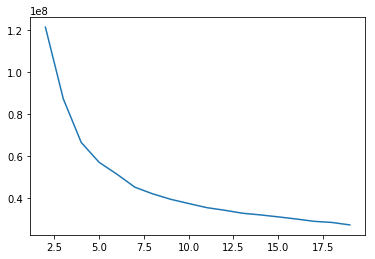

In [135]:
plt.plot(ks, scores)

In [136]:
models[0].labels_.shape

(214,)

In [132]:
pivoted.shape

(214, 24)

In [137]:
dl = pandas.DataFrame({'date': pivoted.index.values, 'label': models[ks.index(5)].labels_})

In [138]:
from calendar import day_abbr, month_abbr

In [140]:
dl['weekday'] = dl.date.apply(lambda x: day_abbr[x.weekday()])

In [141]:
dl['month'] = dl.date.apply(lambda x: month_abbr[x.month])

In [154]:
s = dl.groupby(['label', 'weekday']).size()#.reset_index()#.pivot_table(index='label', values='0', columns='weekday')

In [156]:
s.name = 'count'

In [158]:
s = s.reset_index()

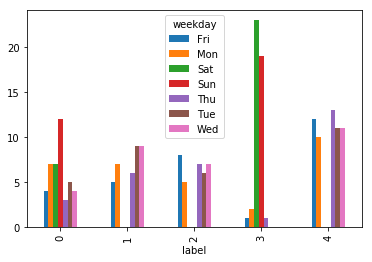

In [161]:
s.pivot_table(index='label', columns='weekday', values='count').plot.bar()

In [162]:
m = dl.groupby(['label', 'month']).size()

In [163]:
m.name = 'count'

In [164]:
m = m.reset_index()

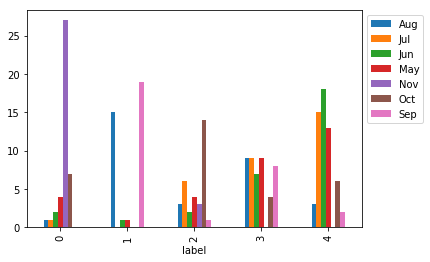

In [167]:
m.pivot_table(index='label', columns='month', values='count').plot.bar()
plt.legend(bbox_to_anchor=(1,1))

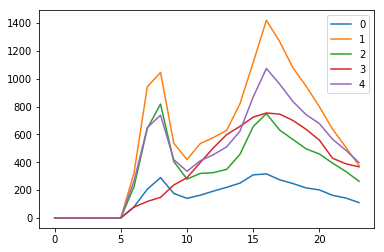

In [175]:
for k, m in enumerate(models[ks.index(5)].cluster_centers_):
    plt.plot(m, label='{}'.format(k))
plt.legend()

In [176]:
per_hour

,timestamp,count,hour,date
0,2016-05-01 06:00:00,35.0,6,2016-05-01
1,2016-05-01 07:00:00,48.0,7,2016-05-01
2,2016-05-01 08:00:00,63.0,8,2016-05-01
3,2016-05-01 09:00:00,108.0,9,2016-05-01
4,2016-05-01 10:00:00,201.0,10,2016-05-01
5,2016-05-01 11:00:00,322.0,11,2016-05-01
6,2016-05-01 12:00:00,415.0,12,2016-05-01
7,2016-05-01 13:00:00,510.0,13,2016-05-01
8,2016-05-01 14:00:00,579.0,14,2016-05-01
9,2016-05-01 15:00:00,574.0,15,2016-05-01


In [177]:
data.columns

Index([u'Start station', u'Start time', u'End station', u'End time',
       u'timestamp', u'count'],
      dtype='object')

In [188]:
d = data[['timestamp', 'count', 'Start station']]

In [191]:
per_time_and_station = d.groupby('Start station').apply(lambda x: x.set_index('timestamp').resample('1h').sum().fillna(0))

In [192]:
del per_time_and_station['Start station']

In [195]:
pts = per_time_and_station.reset_index()

In [196]:
pts['date'] = pts.timestamp.apply(lambda x: x.date())

In [197]:
pts['hour'] = pts.timestamp.apply(lambda x: x.hour)

In [198]:
pivoted = pts.pivot_table(index=['date', 'Start station'], values='count', columns='hour').fillna(0)

In [204]:
ks = range(2, 30)

In [205]:
models = [KMeans(k).fit(pivoted) for k in ks]

In [206]:
scores = [-m.score(pivoted) for m in models]

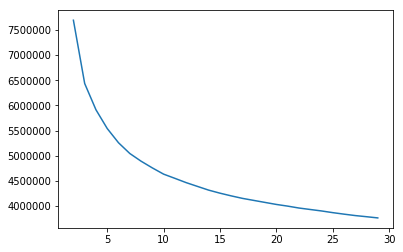

In [207]:
plt.plot(ks, scores)

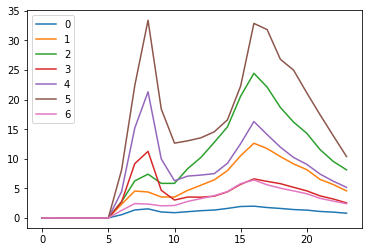

In [234]:
for n, c in enumerate(models[ks.index(7)].cluster_centers_):
    plt.plot(c, label='{}'.format(n))
plt.legend()

In [215]:
pred = pandas.DataFrame({'label': models[ks.index(7)].labels_}, index=pivoted.index).reset_index()

In [ ]:
pred.name

In [225]:
p_new = pred.groupby(['label', 'Start station']).size().rename('count').reset_index()
#.pivot_table(index='label', columns='Start station', values='count').plot.bar()

In [262]:
p_new[(p_new['count'] > 100) & (p_new.label == 3)]

,label,Start station,count
311,3,208.0,102
337,3,245.0,113


In [239]:
?pandas.read_json('data/bysykkel_stations.json', orient='records')

In [241]:
import json

In [247]:
s = json.dumps(json.load(open('data/bysykkel_stations.json'))['stations'])

In [249]:
stations = pandas.read_json(s, orient='records')

In [265]:
stations[stations.id == 245]

,bounds,center,id,in_service,number_of_locks,subtitle,title
83,"[{u'latitude': 59.904370088, u'longitude': 10....","{u'latitude': 59.904441, u'longitude': 10.786188}",245,True,30,ved treningssenteret,Kværnerbyen
